__HANDELING OUTLIERS__
1. Box plot
2. IQR method
3. Z-Score method

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [47]:
df['age'] = df['age'].fillna(df['age'].median())

__1. Box plot__

<Axes: ylabel='age'>

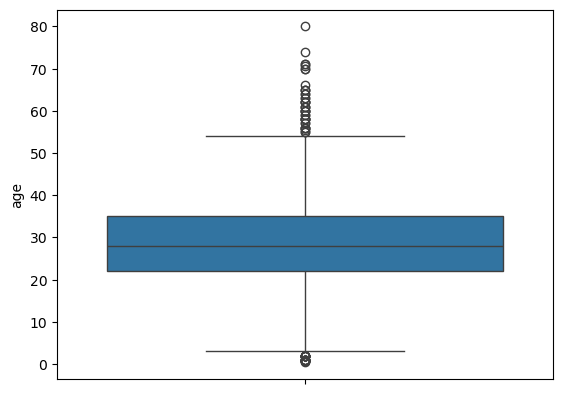

In [48]:
sns.boxplot( y='age', data=df)

In [49]:
df = df[(df['age'] < 40) & (df['age'] > 12)]

<Axes: ylabel='age'>

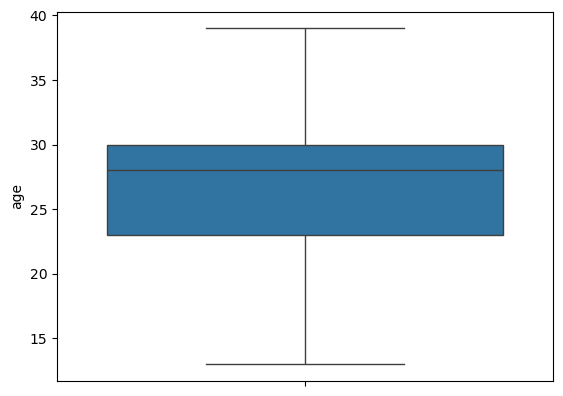

In [50]:
sns.boxplot( y='age', data=df)

__2. IQR method__

<Axes: ylabel='fare'>

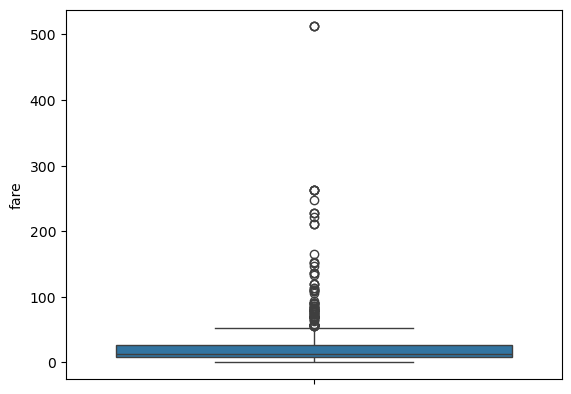

In [51]:
sns.boxplot(y='fare', data=df)

<Axes: ylabel='fare'>

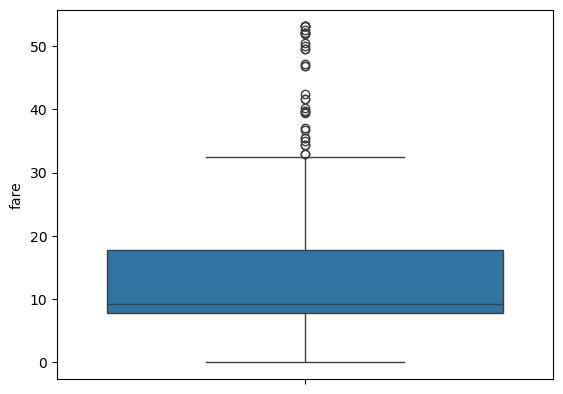

In [52]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers using IQR
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

# Re-plot
sns.boxplot(y='fare', data=df)


__3. Z-Score method__

In [53]:
from scipy.stats import zscore

<Axes: ylabel='age'>

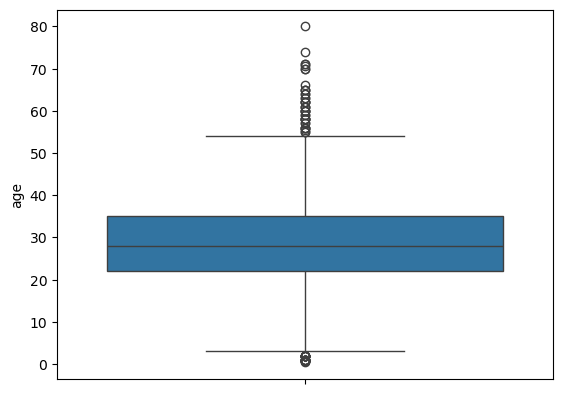

In [54]:
df2 = sns.load_dataset('titanic')
df2['age'] = df2['age'].fillna(df2['age'].median())
sns.boxplot(y='age', data=df2)

In [55]:
# Compute z-scores for a column
z_scores = zscore(df2['age'])

# Convert to absolute values
abs_z_scores = np.abs(z_scores)

# Keep only data within 3 standard deviations
df_clean = df2[abs_z_scores < 1]

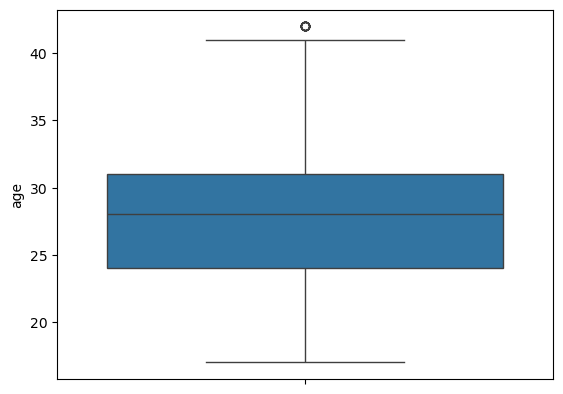

In [56]:
sns.boxplot(y=df_clean['age'])

plt.show()